## ML models

In [2]:
import pandas as pd

### Load data

In [7]:
df_train = pd.read_csv("train_data.csv", index_col=0)
df_test = pd.read_csv("test_data.csv", index_col=0)

In [10]:
def load_data():
    X_train = df_train.drop("label", axis=1)
    y_train = df_train["label"]

    X_test = df_test.drop("label", axis=1)
    y_test = df_test["label"]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data()

In [86]:
print(X_train.shape, X_test.shape)

(2103, 63) (902, 63)


### Decision trees

In [12]:
from sklearn import tree

In [63]:
DTC = tree.DecisionTreeClassifier(
    criterion="entropy",
    max_depth=8,
    min_samples_split=10,
    max_features="auto",
    random_state=100
)

In [64]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [65]:
train_score = DTC.score(X_train, y_train)
test_score = DTC.score(X_test, y_test)

print("Training accuracy: {0:5.2f}%.\
      \nTesting accuracy: {1:5.2f}%"
      .format(100*train_score, 100*test_score))

Training accuracy: 93.34%.      
Testing accuracy: 86.59%


### Radom forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
RFC = RandomForestClassifier(
    n_estimators=100,
    criterion="entropy",
    max_depth=5,
    min_samples_split=10,
    random_state=100,
)

In [74]:
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [75]:
train_score = RFC.score(X_train, y_train)
test_score = RFC.score(X_test, y_test)

print("Training accuracy: {0:5.2f}%.\
      \nTesting accuracy: {1:5.2f}%"
      .format(100*train_score, 100*test_score))

Training accuracy: 96.53%.      
Testing accuracy: 93.46%


### Gradient boosting tree

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
GBC = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    max_depth=2, 
    random_state=100
)

In [84]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=100, subsample=0.8, verbose=0,
              warm_start=False)

In [85]:
train_score = GBC.score(X_train, y_train)
test_score = GBC.score(X_test, y_test)

print("Training accuracy: {0:5.2f}%.\
      \nTesting accuracy: {1:5.2f}%"
      .format(100*train_score, 100*test_score))

Training accuracy: 99.10%.      
Testing accuracy: 95.23%


In [94]:
y_test.value_counts()

company     273
profile     255
tasks       195
benefits    179
Name: label, dtype: int64

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = ["company", "tasks", "profile", "benefits"]
y_pred_train = GBC.predict(X_train)
y_pred_test = GBC.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train, labels=labels)
cm_test = confusion_matrix(y_test, y_pred_test, labels=labels)

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14, cmap=plt.cm.RdBu_r):
    """Prints a confusion matrix as a heatmap.
    
    Inputs
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
    fontsize: int
        Font size for axes labels.
        
    Outputs
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap=cmap)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label', fontsize=fontsize)
    plt.xlabel('Predicted label', fontsize=fontsize)

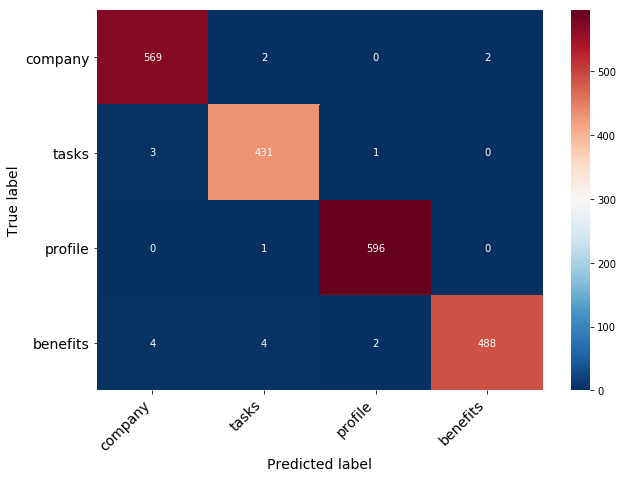

In [106]:
print_confusion_matrix(confusion_matrix=cm_train, class_names=labels)

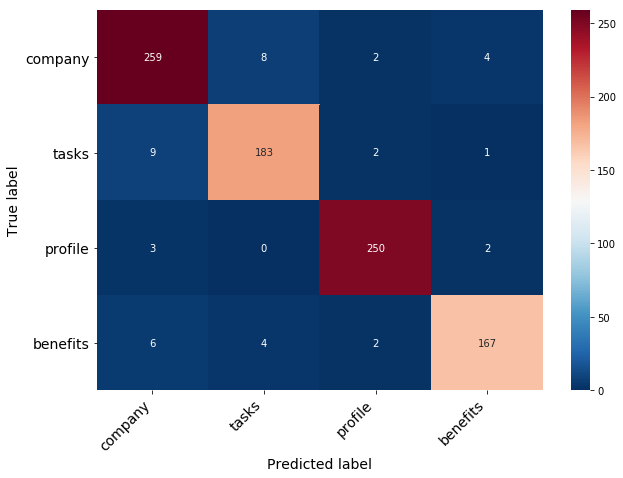

In [105]:
print_confusion_matrix(confusion_matrix=cm_test, class_names=labels)